<a href="https://colab.research.google.com/github/BobGanti/Machine-Learning/blob/main/ML-Algorithn-Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from keras.datasets import mnist


#### Loading MNIST Dataset from Keras with Tensrorflow

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

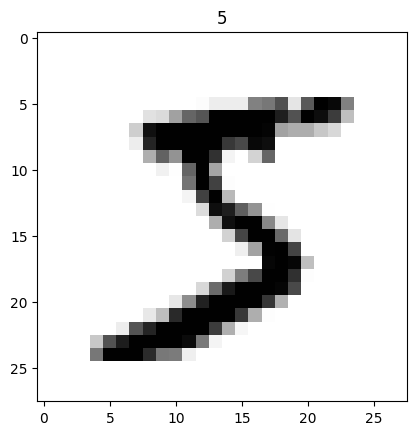

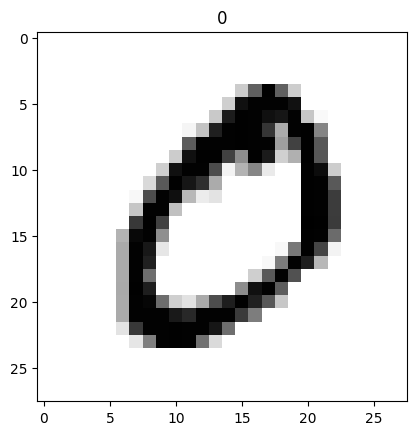

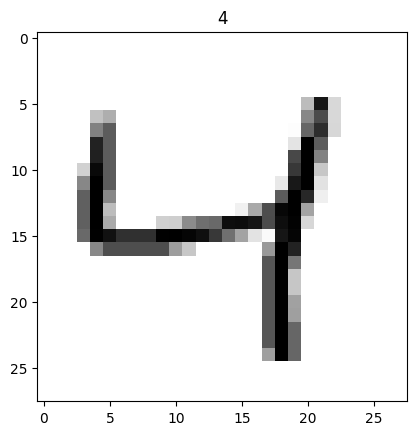

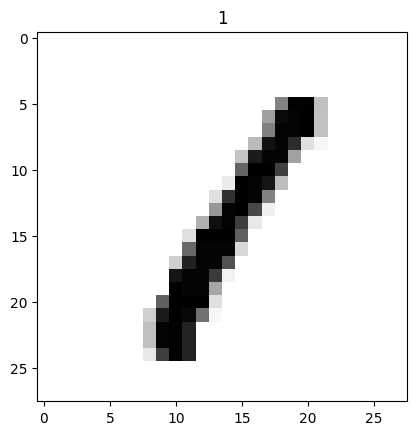

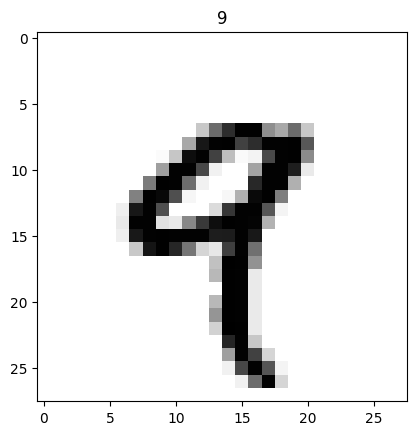

In [3]:
def plot_imput_images(i):
    plt.imshow(train_images[i], cmap='binary')
    plt.title(train_labels[i])
    plt.axis = 'off'
    plt.show()

for i in range(5):
    plot_imput_images(i)


#### Normalise the images

In [14]:
from keras.utils import to_categorical

# Normalising images to a range of 0 to 1 [0, 1] range
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Converting labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


#### 1. Basic CNN Architecture

In [ ]:

from keras import models, layers

# Basic CNN model 1
basic_model = models.Sequential()
basic_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
basic_model.add(layers.MaxPooling2D((2, 2)))
basic_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
basic_model.add(layers.MaxPooling2D((2, 2)))
basic_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add dense layers on top
basic_model.add(layers.Flatten())
basic_model.add(layers.Dense(64, activation='relu'))
basic_model.add(layers.Dense(10, activation='softmax'))

 # Summary of the model
basic_model.summary()

basic_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

basic_history = basic_model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

basic_loss, basic_acc = basic_model.evaluate(test_images, test_labels)
print('CNN Accuracy: ', basic_acc)

#### 1.4. CNN Visualisation

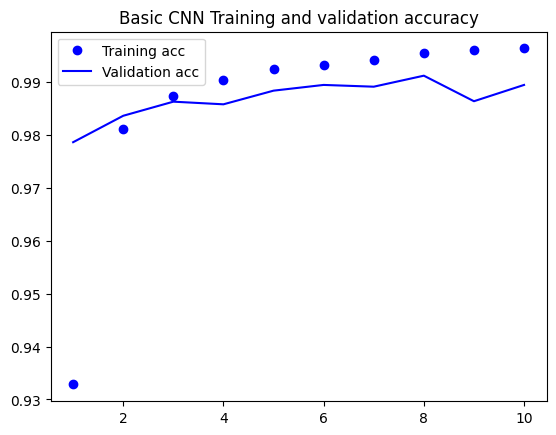

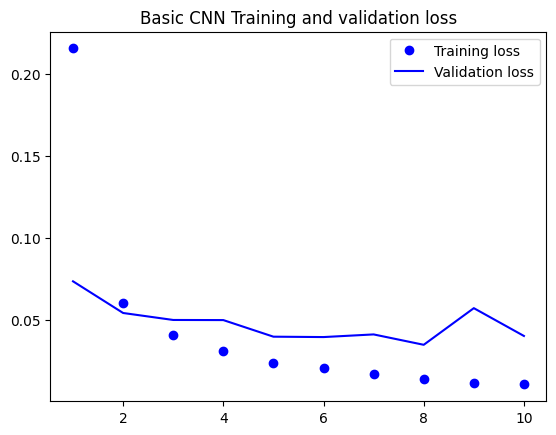

In [ ]:
import matplotlib.pyplot as plt

basic_acc = basic_history.history['accuracy']
basic_val_acc = basic_history.history['val_accuracy']
basic_loss = basic_history.history['loss']
basic_val_loss = basic_history.history['val_loss']

epochs = range(1, len(basic_acc) + 1)

plt.plot(epochs, basic_acc, 'bo', label='Training acc')
plt.plot(epochs, basic_val_acc, 'b', label='Validation acc')
plt.title('Basic CNN Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, basic_loss, 'bo', label='Training loss')
plt.plot(epochs, basic_val_loss, 'b', label='Validation loss')
plt.title('Basic CNN Training and validation loss')
plt.legend()

plt.show()


#### 2. LeNet-5 Model

In [ ]:

lenet_model = models.Sequential([
    layers.Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D(),
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
    layers.AveragePooling2D(),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Summary of the model
lenet_model.summary()

lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

lenet_history = lenet_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


lenet_loss, lenet_acc = lenet_model.evaluate(test_images, test_labels)
print('AlexNet Accuracy: ', lenet_acc)



#### 2.1. LeNet-5 Visualisation

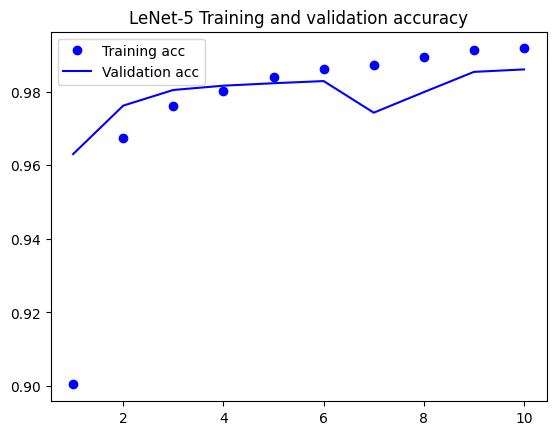

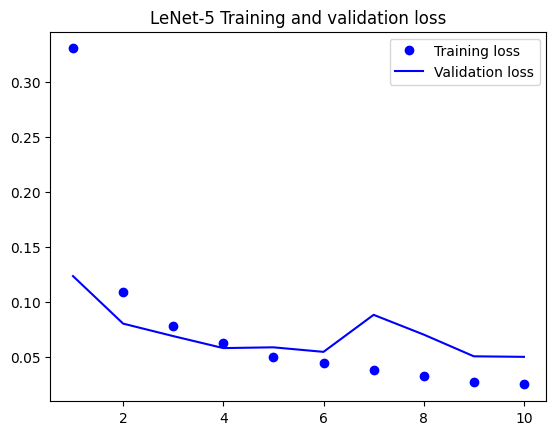

In [ ]:
lenet_acc = lenet_history.history['accuracy']
lenet_val_acc = lenet_history.history['val_accuracy']
lenet_loss = lenet_history.history['loss']
lenet_val_loss = lenet_history.history['val_loss']

epochs = range(1, len(lenet_acc) + 1)

plt.plot(epochs, lenet_acc, 'bo', label='Training acc')
plt.plot(epochs, lenet_val_acc, 'b', label='Validation acc')
plt.title('LeNet-5 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, lenet_loss, 'bo', label='Training loss')
plt.plot(epochs, lenet_val_loss, 'b', label='Validation loss')
plt.title('LeNet-5 Training and validation loss')
plt.legend()

plt.show()

#### 3. AlexNet-inspired Model

In [ ]:
from keras import models, layers

# Model architecture (more suitable for smaller input size)
alexnet_model = models.Sequential([
    layers.Conv2D(48, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(192, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.Conv2D(192, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compiling
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to check the architecture
alexnet_model.summary()

# Train the model
alexnet_history = alexnet_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
alexnet_loss, alexnet_acc = alexnet_model.evaluate(test_images, test_labels)
print(f"AlexNet accuracy: {alexnet_acc}")



#### 3.3. AlexNet Visualisation

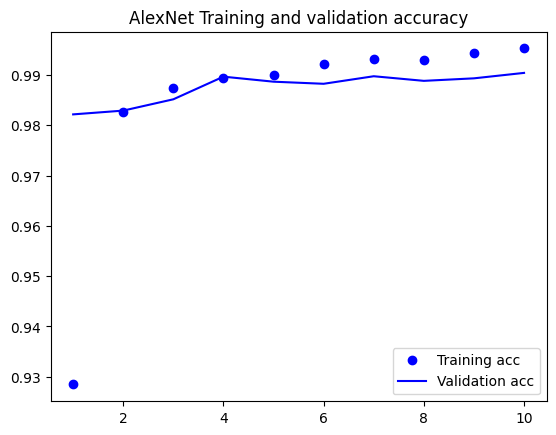

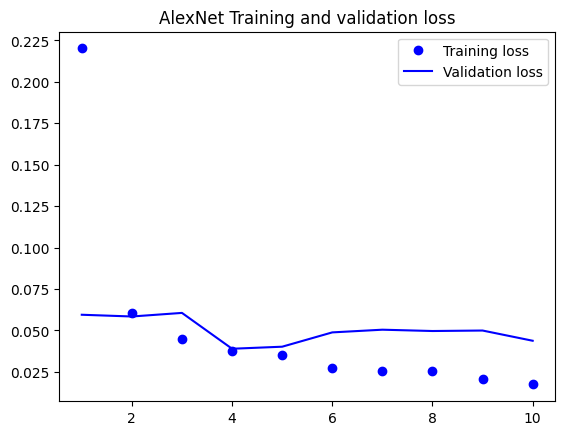

In [ ]:
alexnet_acc = alexnet_history.history['accuracy']
alexnet_val_acc = alexnet_history.history['val_accuracy']
alexnet_loss = alexnet_history.history['loss']
alexnet_val_loss = alexnet_history.history['val_loss']

epochs = range(1, len(alexnet_acc) + 1)

plt.plot(epochs, alexnet_acc, 'bo', label='Training acc')
plt.plot(epochs, alexnet_val_acc, 'b', label='Validation acc')
plt.title('AlexNet Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, alexnet_loss, 'bo', label='Training loss')
plt.plot(epochs, alexnet_val_loss, 'b', label='Validation loss')
plt.title('AlexNet Training and validation loss')
plt.legend()

plt.show()

### 4. Custom CNN

In [ ]:
import time
from keras import models, layers, optimizers
from keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np

train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0  # Reshape and normalize
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

custom_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Start timing
start_time = time.time()

# Train the model
custom_history = custom_model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# End timing
end_time = time.time()

# Calculate the total training time
total_training_time = end_time - start_time
print(f"Total training time for Custom CNN: {total_training_time:.2f} seconds")

# Evaluate the model
custom_loss, custom_acc = custom_model.evaluate(test_images, test_labels)
print(f"Custom CNN accuracy: {custom_acc}")

# Calculate predictions for precision, recall, and F1-score
predictions = custom_model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_labels, axis=1)
print(classification_report(test_labels, predictions))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Assume 'model_predictions' to be your model's predictions
conf_matrix = confusion_matrix(test_labels, predictions)
print(classification_report(test_labels, predictions))

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#### Custom Model Visualisation

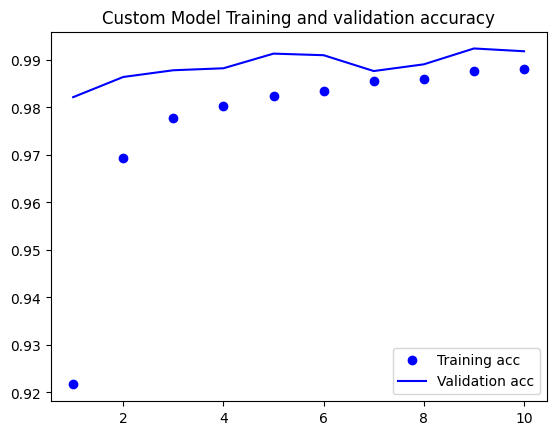

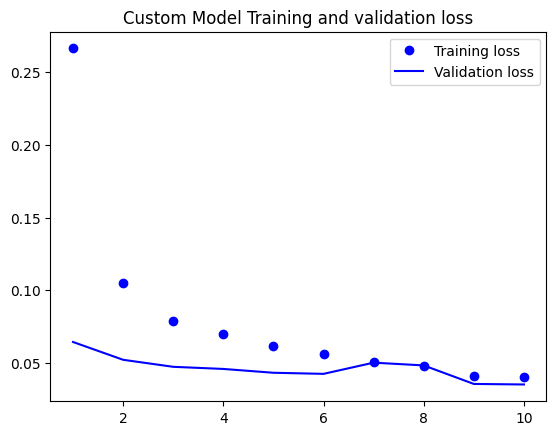

In [ ]:
custom_acc = custom_history.history['accuracy']
custom_val_acc = custom_history.history['val_accuracy']
custom_loss = custom_history.history['loss']
custom_val_loss = custom_history.history['val_loss']

epochs = range(1, len(custom_acc) + 1)

plt.plot(epochs, custom_acc, 'bo', label='Training acc')
plt.plot(epochs, custom_val_acc, 'b', label='Validation acc')
plt.title('Custom Model Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, custom_loss, 'bo', label='Training loss')
plt.plot(epochs, custom_val_loss, 'b', label='Validation loss')
plt.title('Custom Model Training and validation loss')
plt.legend()

plt.show()

#### Comparing Accuracies

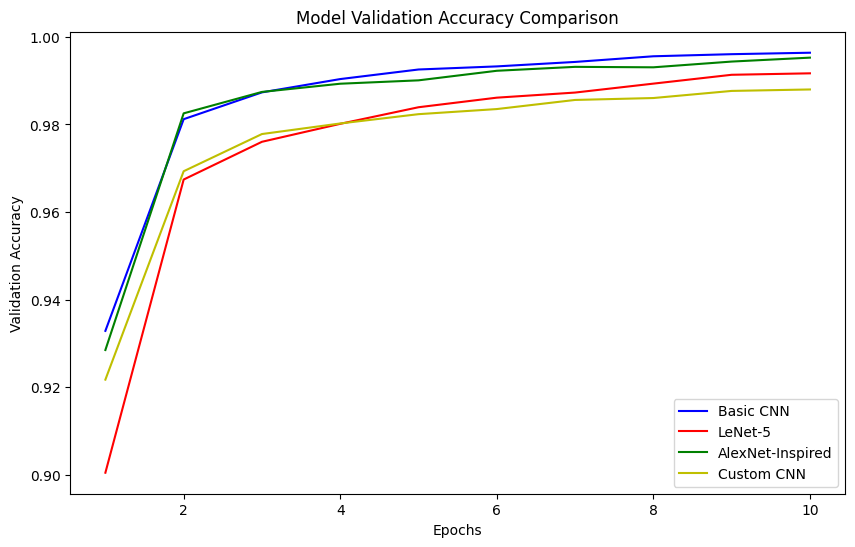

In [ ]:
import matplotlib.pyplot as plt

# Number of epochs (assuming all models trained for the same number of epochs)
epochs = range(1, len(basic_acc) + 1)

# Plot validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(epochs, basic_acc, 'b-', label='Basic CNN')
plt.plot(epochs, lenet_acc, 'r-', label='LeNet-5')
plt.plot(epochs, alexnet_acc, 'g-', label='AlexNet-Inspired')
plt.plot(epochs, custom_acc, 'y-', label='Custom CNN')
plt.title('Model Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


#### Comparing Losses

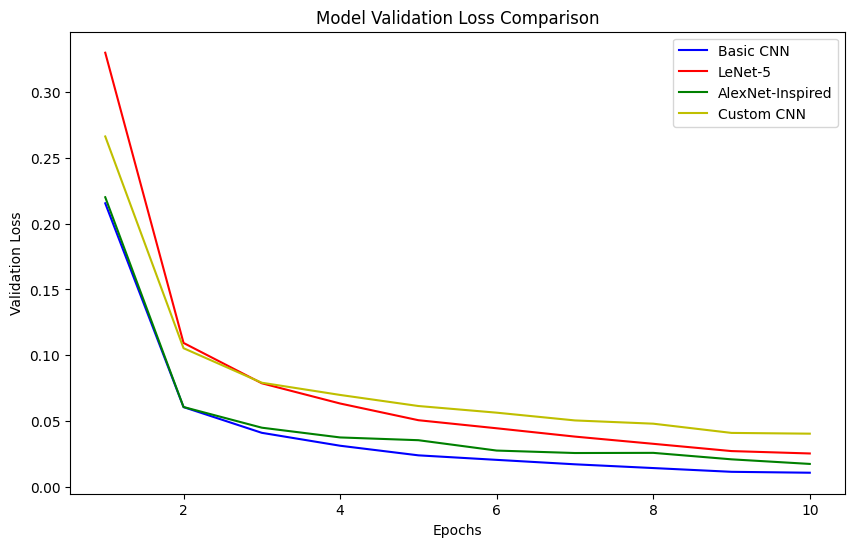

In [ ]:
# Plot validation losses
plt.figure(figsize=(10, 6))
plt.plot(epochs, basic_loss, 'b-', label='Basic CNN')
plt.plot(epochs, lenet_loss, 'r-', label='LeNet-5')
plt.plot(epochs, alexnet_loss, 'g-', label='AlexNet-Inspired')
plt.plot(epochs, custom_loss, 'y-', label='Custom CNN')
plt.title('Model Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


## Reshaping input images for Non-CNN Models.

 #### Since these models from Scikit-learn expect 2D input for each sample, we'll reshape the images and normalize the pixel values.

In [21]:
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Flatten the images: The images are 28x28, we convert them to 784-dimensional vectors.
X_train = train_images.reshape((60000, 28 * 28))
X_test = test_images.reshape((10000, 28 * 28))

# Normalize the data: We scale the pixel values to a range of 0 to 1 before inputting to the model.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ensure the labels are integers (needed for the SVM)
y_train = train_labels.astype(np.int_)
y_test = test_labels.astype(np.int_)


### 1. Support Vector Machine (SVM)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import time

# Assuming X_train, y_train, X_test, y_test are preprocessed and ready for training

# Initialize SGDClassifier configured to approximate an SVM
sgd_model = SGDClassifier(loss='hinge', max_iter=1, verbose=1, learning_rate='constant', eta0=0.001)

# Classes needed for partial_fit
classes = np.unique(y_train)

# Start the timer
start_time = time.time()

# Manually iterate over mini-batches and fit
for epoch in range(10):  # Number of passes over the dataset
    for i in range(0, len(X_train), 1000):  # Batch size of 1000
        end = i + 1000
        batch_x, batch_y = X_train[i:end], y_train[i:end]
        sgd_model.partial_fit(batch_x, batch_y, classes=classes)
        if i % 1000 == 0:  # Print progress after each batch
            print(f"Processed batch {i//1000 + 1} in epoch {epoch + 1}")

# End the timer
end_time = time.time()

# Calculate the total training time
total_training_time = end_time - start_time
print(f"Total training time: {total_training_time:.2f} seconds")

# Evaluate the model
sgd_predictions = sgd_model.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
print(f"SGD-SVM Approximation Accuracy: {sgd_accuracy}")


### RandomForext

In [25]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Start the timer
start_time = time.time()

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42, verbose=1)  # Increased n_estimators for robustness
rf_model.fit(X_train, y_train)

# End the timer
end_time = time.time()

# Calculate the total training time
total_training_time = end_time - start_time
print(f"Total training time for Random Forest: {total_training_time:.2f} seconds")

# Predict on the test set
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   20.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:  2.9min
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:  5.1min


Total training time for Random Forest: 381.50 seconds


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    2.3s


Random Forest Accuracy: 0.9725


### KNN

In [27]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Start the timer for training (model fitting)
start_fit_time = time.time()

# Train a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)  # The choice of 3 neighbors is typical but can be tuned
knn_model.fit(X_train, y_train)

# End the timer for training
end_fit_time = time.time()

# Calculate the total fitting time
fitting_time = end_fit_time - start_fit_time
print(f"KNN Fitting Time: {fitting_time:.2f} seconds")

# Start the timer for prediction
start_pred_time = time.time()

# Predict on the test set
knn_predictions = knn_model.predict(X_test)

# End the timer for prediction
end_pred_time = time.time()

# Calculate the total prediction time
prediction_time = end_pred_time - start_pred_time
print(f"KNN Prediction Time: {prediction_time:.2f} seconds")

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy}")


KNN Fitting Time: 0.04 seconds
KNN Prediction Time: 29.78 seconds
KNN Accuracy: 0.9705


### Multi-Layer Perceptron (MLP)

In [ ]:
import time
from keras.models import Sequential
from keras.layers import Dense

# Define the MLP model
mlp_model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),  # Input layer with 512 neurons, 'relu' activation
    Dense(256, activation='relu'),  # Hidden layer with 256 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons for each digit class
])

# Compile the model
mlp_model.compile(optimizer='adam',  # Optimizer
                  loss='sparse_categorical_crossentropy',  # Loss function for integers
                  metrics=['accuracy'])  # Metric to monitor

# Start the timer
start_time = time.time()

# Train the model
mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# End the timer
end_time = time.time()

# Calculate the total training time
total_training_time = end_time - start_time
print(f"Total training time for MLP: {total_training_time:.2f} seconds")

# Evaluate the model on the test set
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
print(f"MLP Accuracy: {mlp_accuracy}")


### Models Comparison Chart

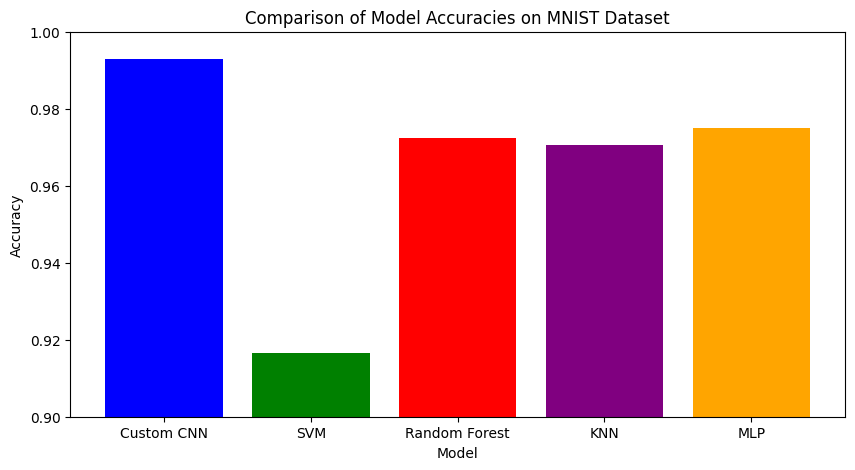

In [ ]:
import matplotlib.pyplot as plt

# Example accuracies - replace these with your actual model accuracy values
model_names = ['Custom CNN', 'SVM', 'Random Forest', 'KNN', 'MLP']
accuracies = [0.9930, 0.9166, 0.9725, 0.9705, 0.9750]  # Example accuracies

plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies on MNIST Dataset')
plt.ylim([0.90, 1])  # Adjust limits based on your accuracy scores to better visualize differences
plt.show()


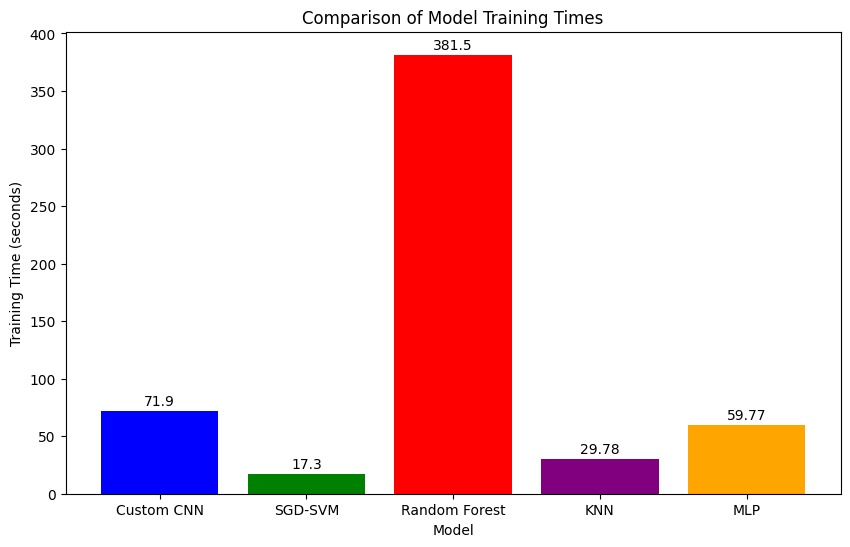

In [30]:
import matplotlib.pyplot as plt

# Model names
model_names = ['Custom CNN', 'SGD-SVM', 'Random Forest', 'KNN', 'MLP']

# Training times in seconds (example values)
training_times = [71.90, 17.30, 381.50, 29.78, 59.77]

plt.figure(figsize=(10, 6))
plt.bar(model_names, training_times, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Comparison of Model Training Times')
plt.ylim(0, max(training_times) + 20)  # Add some space above the highest bar for clarity

# Adding the exact time above each bar for better readability
for i in range(len(training_times)):
    plt.text(i, training_times[i] + 5, str(training_times[i]), ha = 'center', color = 'black')

plt.show()
